## essentials

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

df = pd.read_csv('../data/edges.csv', skiprows=1, header=None)
# display(df)
edges = [tuple(x) for x in df.values]

G = nx.Graph()
G.add_edges_from(edges)
layout = nx.spring_layout(G, seed=42)
fig = plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='y', node_size=500, pos =layout)

## trial -1

### betweeness centrality sorted

In [ ]:
betweenness = nx.betweenness_centrality(G)
betweeness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
#access only the node names
betweeness_nodes = [x[0] for x in betweeness_sorted]
betweeness_nodes[:5]

[11, 1, 15, 44, 43]

In [ ]:
#reading the csv file that contains the plci
df = pd.read_csv('../data/model_output_full.csv', skiprows=1, header=None)

betw = dict(zip(df[10], df[7]))
#sort them based on the values
betw_sorted = sorted(betw.items(), key=lambda x: x[1], reverse=True)
betw_nodes =[x[0] for x in betw_sorted]
betw_nodes[:5]

[11, 1, 15, 44, 43]

In [ ]:
#do the same but for percolation on column 9
perc = dict(zip(df[10], df[9]))
perc_sorted = sorted(perc.items(), key=lambda x: x[1], reverse=True)
perc_nodes =[x[0] for x in perc_sorted]
perc_nodes[:5]

[17, 1, 31, 9, 29]

In [ ]:
c=0
for i in range(62):
    if betw_nodes[i]!=betweeness_nodes[i]:
        print(betw_nodes[i],"on the %d position"%i)
        c+=1
c

4 on the 40 position
6 on the 41 position
8 on the 42 position
25 on the 43 position
27 on the 44 position
28 on the 45 position
55 on the 46 position
59 on the 47 position
2 on the 48 position
3 on the 49 position
32 on the 50 position
33 on the 51 position
23 on the 52 position
19 on the 53 position
20 on the 54 position
21 on the 55 position
46 on the 56 position
57 on the 57 position
58 on the 58 position


19

### Complex centrality sorted

### extraction

In [ ]:
#reading the csv file that contains the plci
df = pd.read_csv('../data/model_output_full.csv', skiprows=1, header=None)
#putting col 10 as keys and col 4 as values in a dictionary
plci = dict(zip(df[10], df[4]))
#sort them based on the values
plci_sorted = sorted(plci.items(), key=lambda x: x[1], reverse=True)
plci_nodes =[x[0] for x in plci_sorted]

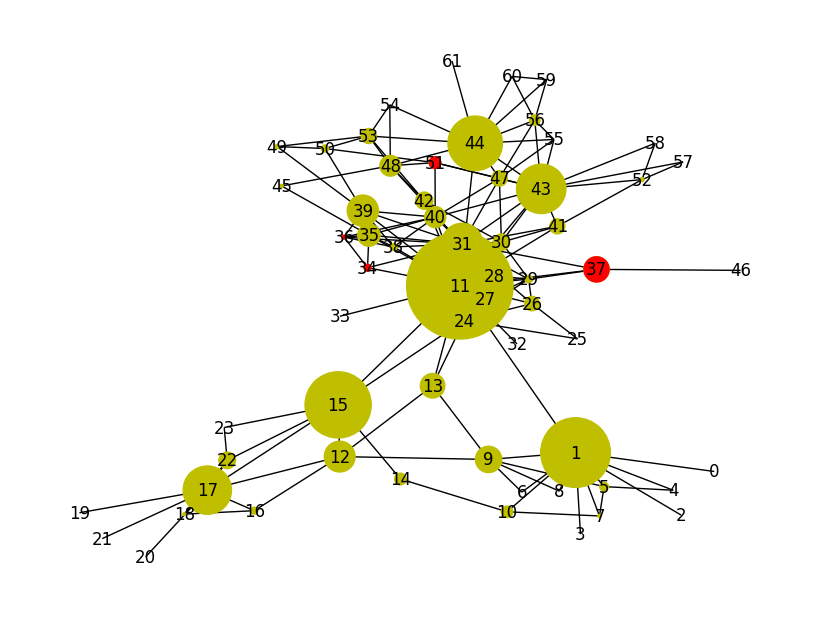

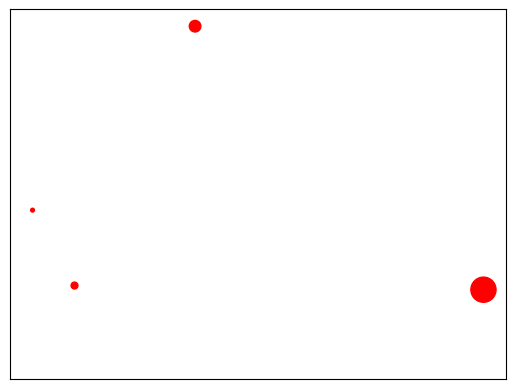

In [ ]:
plci_nodes[:5]
#plot the graph and color the top 5 nodes based on plci and size based on betweeness

top_5_plci_nodes = plci_nodes[:5]
top_5_sizes = [betweenness[v] * 10000 for v in top_5_plci_nodes]

fig = plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='y', node_size=[v * 10000 for v in betweenness.values()], pos=layout)
nx.draw_networkx_nodes(G, pos=layout, nodelist=top_5_plci_nodes, node_color='r', node_size=top_5_sizes)
plt.show()
nx.draw_networkx_nodes(G, pos=layout, nodelist=top_5_plci_nodes, node_color='r', node_size=top_5_sizes)
plt.show()

### The attack 

In [ ]:
def compute_lcc(G):
    if G.number_of_nodes() == 0:
        return 0
    else:
        max_comp= max(nx.connected_components(G), key=len)
        return len(max_comp)
    
def compute_i(G, i):
    if G.number_of_nodes() == 0:
        return 0
    else:
        max_comp= max(nx.connected_components(G), key=len)
        return len(max_comp)/i

def attack(G, sorted_nodes):
    LCC={}#key is the # of nnodes removed, value is the size of the largest connected component
    Inter={}
    fix_size=G.number_of_nodes()
    G_copy = G.copy()
    for i in range(len(sorted_nodes)):
        G_copy.remove_node(sorted_nodes[i])
        lcc = compute_lcc(G_copy)
        i_index= compute_i(G_copy, fix_size)
        LCC[i+1] = lcc
        Inter[i+1]=i_index
    return LCC, Inter

bet_attack =attack(G, betweeness_nodes)
plci_attack=attack(G, plci_nodes)
per_attack=attack(G, perc_nodes)
# compute_lcc(G)

In [ ]:
degrees={}
for n in G.nodes():
    degrees[n]=G.degree(n)
# degrees
#srt degrees by keys NOT values
# degrees

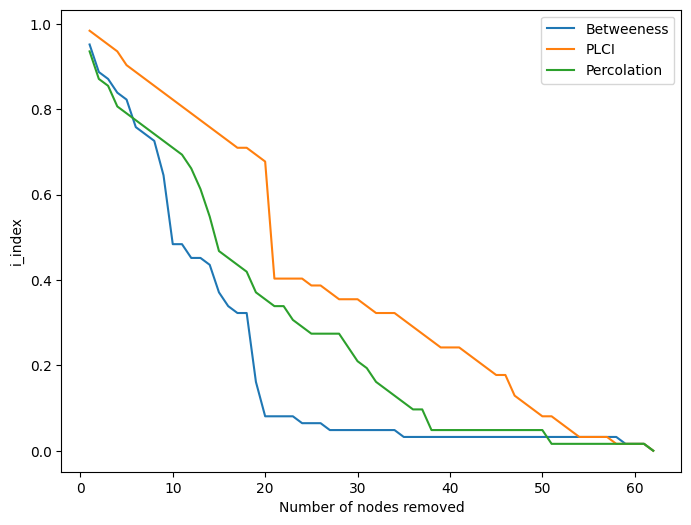

In [ ]:
#i wanna plot the bet_attack and plci_attack on same plot where keys are the x axis and values are on y
fig = plt.figure(figsize=(8, 6))
plt.plot(list(bet_attack.keys()), list(bet_attack.values()), label='Betweeness')
plt.plot(list(plci_attack.keys()), list(plci_attack.values()), label='PLCI')
plt.plot(list(per_attack.keys()), list(per_attack.values()), label='Percolation')
# plt.plot(list(degrees.keys()), list(degrees.values()), label='Degree')
plt.legend()
plt.xlabel('Number of nodes removed')
plt.ylabel('i_index')
plt.show()